<IPython.core.display.Javascript object>


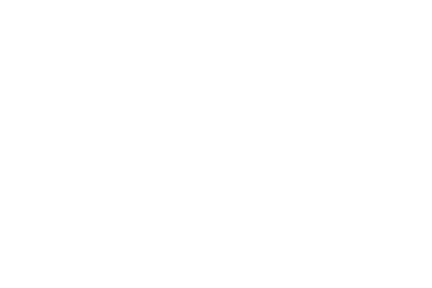

<IPython.core.display.Javascript object>


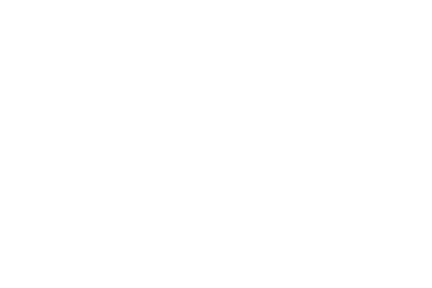

In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np

def ellipse (cx, cy, rx, ry, n):
    return [cx + rx*np.cos(2*np.pi*i/n) for i in range(n)], \
           [cy + ry*np.sin(2*np.pi*i/n) for i in range(n)]

def rotate (points, alpha):
    x, y = points
    return ([ x*np.cos(alpha) - y*np.sin(alpha) for (x, y) in zip(x, y)],
            [ x*np.sin(alpha) + y*np.cos(alpha) for (x, y) in zip(x, y)])


e = ellipse(0, 0, 5, 2, 100)
alpha = np.pi/5
re = rotate(e, alpha)
plt.plot(*re, 'bx')
plt.axis('equal')
plt.show()

In [12]:
re_cov = np.cov(re)
print('matrice de co-variance:\n {} \n'.format(re_cov))

matrice de co-variance:
 [[ 8.96195881  5.04348153]
 [ 5.04348153  5.68450584]] 



In [13]:
lambdas, A = np.linalg.eig(re_cov)
print("Valeurs propres {}\n".format(lambdas))
print("Matrice de rotation\n", A)

Valeurs propres [ 12.62626263   2.02020202]

Matrice de rotation
 [[ 0.80901699 -0.58778525]
 [ 0.58778525  0.80901699]]


Là je prends les racines carrées des valeurs propres; en fait les valeurs propres ici sont homogènes à des variances, donc à des écart-types au carré..

In [14]:
r_lambdas = np.sqrt(lambdas)

Je prends comme vecteurs d'entrée $i$ et $j$ et je les multiplie par les racines carrées des valeurs propres:

In [6]:
v1 = r_lambdas[0] * np.array([1, 0])
v2 = r_lambdas[1] * np.array([0, 1])

Et maintenant j'applique la rotation, les points r1 et r2 sont les deux que je vais vouloir tracer:

In [9]:
r1 = A.dot(v1)
r2 = A.dot(v2)

Maintenant je retrace l'ellipse, avec les deux points en question

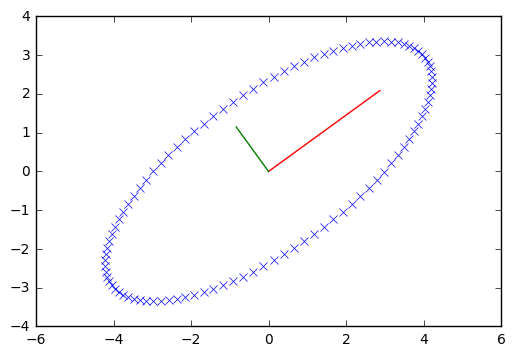

In [10]:
plt.plot(*re, 'bx')
plt.axis('equal')
plt.plot( (0, r1[0]), (0, r1[1]), 'r-')
plt.plot( (0, r2[0]), (0, r2[1]), 'g-')
plt.show()